#Dataset1 
Asthma-Related Emergency Room Visits in Utah
JSON

In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import json
import requests

In [151]:
#Import JSON data
import urllib.request, json 
with urllib.request.urlopen("https://opendata.utah.gov/resource/gmqg-7pif.json") as url:
    data1 = json.loads(url.read().decode())
    print(data1)

[{':@computed_region_d2c3_wkvq': '2986', '_1st_max_hour': '0', '_1st_max_value': '76', 'aqi': '61', 'arithmetic_mean': '76', 'cbsa_name': 'Logan, UT-ID', 'city_name': 'Logan', 'county_code': '5', 'county_name': 'Cache', 'date_local': '2000-01-01T00:00:00.000', 'date_of_last_change': '2013-06-29T00:00:00.000', 'datum': 'NAD83', 'event_type': 'None', 'local_site_name': 'LOGAN #4', 'location_1': {'type': 'Point', 'coordinates': [-111.8375, 41.731111]}, 'location_1_location': '125 W. CENTER STREET, LOGAN, UT', 'method_name': 'R&P Model 2000 Partisol - GRAVIMETRIC', 'observation_count': '1', 'observation_percent': '100.0', 'parameter_code': '81102', 'parameter_name': 'PM10 Total 0-10um STP', 'poc': '1', 'pollutant_standard': 'PM10 24-hour 2006', 'sample_duration': '24 HOUR', 'site_num': '4', 'state_code': '49', 'state_name': 'Utah', 'units_of_measure': 'Micrograms/cubic meter (25 C)'}, {':@computed_region_d2c3_wkvq': '2986', '_1st_max_hour': '0', '_1st_max_value': '17', 'aqi': '16', 'arithm

In [152]:
#Quick look at the data
data1 = pd.DataFrame(data=data1)
print(data1.dtypes)

:@computed_region_d2c3_wkvq    object
_1st_max_hour                  object
_1st_max_value                 object
aqi                            object
arithmetic_mean                object
cbsa_name                      object
city_name                      object
county_code                    object
county_name                    object
date_local                     object
date_of_last_change            object
datum                          object
event_type                     object
local_site_name                object
location_1                     object
location_1_location            object
method_name                    object
observation_count              object
observation_percent            object
parameter_code                 object
parameter_name                 object
poc                            object
pollutant_standard             object
sample_duration                object
site_num                       object
state_code                     object
state_name  

In [153]:
data1.describe()

,:@computed_region_d2c3_wkvq,_1st_max_hour,_1st_max_value,aqi,arithmetic_mean,cbsa_name,city_name,county_code,county_name,date_local,...,observation_percent,parameter_code,parameter_name,poc,pollutant_standard,sample_duration,site_num,state_code,state_name,units_of_measure
count,1000,1000,1000,1000,1000,943,1000,1000,1000,1000,...,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,3,1,102,76,102,2,5,3,3,360,...,1,1,1,3,1,1,6,1,1,1
top,3176,0,16,31,16,"Salt Lake City, UT",Salt Lake City,35,Salt Lake,2000-07-11T00:00:00.000,...,100.0,81102,PM10 Total 0-10um STP,1,PM10 24-hour 2006,24 HOUR,12,49,Utah,Micrograms/cubic meter (25 C)
freq,825,1000,32,45,32,825,562,825,825,6,...,1000,1000,1000,547,1000,1000,343,1000,1000,1000


In [154]:
#Check how many rows in each column are null
data1.isna().sum().sort_values(ascending=False)

cbsa_name                      57
units_of_measure                0
state_name                      0
_1st_max_hour                   0
_1st_max_value                  0
aqi                             0
arithmetic_mean                 0
city_name                       0
county_code                     0
county_name                     0
date_local                      0
date_of_last_change             0
datum                           0
event_type                      0
local_site_name                 0
location_1                      0
location_1_location             0
method_name                     0
observation_count               0
observation_percent             0
parameter_code                  0
parameter_name                  0
poc                             0
pollutant_standard              0
sample_duration                 0
site_num                        0
state_code                      0
:@computed_region_d2c3_wkvq     0
dtype: int64

In [155]:
#Check to make sure we took care of null values
data1.isna().sum()

:@computed_region_d2c3_wkvq     0
_1st_max_hour                   0
_1st_max_value                  0
aqi                             0
arithmetic_mean                 0
cbsa_name                      57
city_name                       0
county_code                     0
county_name                     0
date_local                      0
date_of_last_change             0
datum                           0
event_type                      0
local_site_name                 0
location_1                      0
location_1_location             0
method_name                     0
observation_count               0
observation_percent             0
parameter_code                  0
parameter_name                  0
poc                             0
pollutant_standard              0
sample_duration                 0
site_num                        0
state_code                      0
state_name                      0
units_of_measure                0
dtype: int64

Exploring the Data
We will explore a little bit to find some trends

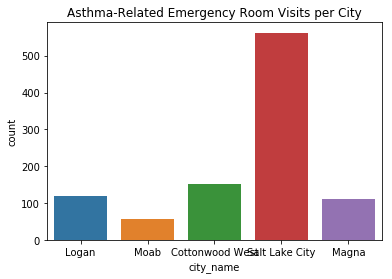

In [156]:
plot1 = sns.countplot(data1["city_name"])
plot1.set_title("Asthma-Related Emergency Room Visits per City")
plt.show()

There are clearly a lot more visits to the emergency room in Salt Lake City than any other city. Possible hypotheses include SLC having more people, having worse air quality due to inversion, increased emissions in the city.

Text(0.5, 1.0, 'Asthma-Related Emergency Room Visits by Date')

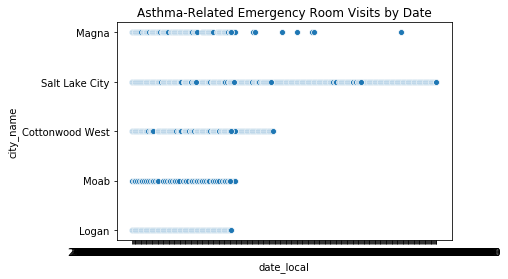

In [157]:
plot11 = sns.scatterplot(x="date_local", y="city_name", x_bins=12, data=data1)
plot11.set_title("Asthma-Related Emergency Room Visits by Date")

From this graph, we can interpret that cities like Moab and Logan have most of their emergency room visits during winter months while SLC show a consistency throughout the year. 

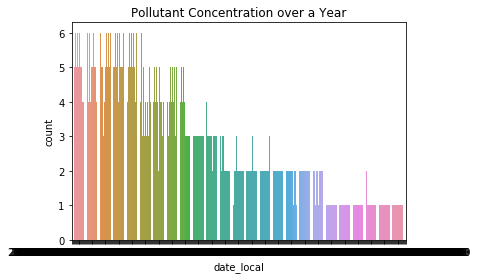

In [158]:
plot111 = sns.countplot(data1["date_local"])
plot111.set_title("Pollutant Concentration over a Year")
plt.show()

This graph shows that there are higher concentrations of pollutants in the air during the earlier months of the year, and it continuously drops. 

#Dataset2 
Pollution Emission Data in Utah
CSV

In [159]:
#Import CSV file
data2 = pd.read_csv("/Users/LindseyTakeuchi/Downloads/Daily_PM10_Pollution_Emissions_Utah_2000.csv")

In [160]:
#Quick look at the data
data2.head()

,State Code,County Code,Site Num,Parameter Code,POC,Datum,Parameter Name,Sample Duration,Pollutant Standard,Date Local,...,1st Max Hour,AQI,Method Name,Local Site Name,State Name,County Name,City Name,CBSA Name,Date of Last Change,Location 1
0,49,5,4,81102,1,NAD83,PM10 Total 0-10um STP,24 HOUR,PM10 24-hour 2006,01/01/2000 12:00:00 AM,...,0,61,R&P Model 2000 Partisol - GRAVIMETRIC,LOGAN #4,Utah,Cache,Logan,"Logan, UT-ID",06/29/2013 12:00:00 AM,"125 W. CENTER STREET, LOGAN, UT\n(41.731111, -..."
1,49,5,4,81102,1,NAD83,PM10 Total 0-10um STP,24 HOUR,PM10 24-hour 2006,01/04/2000 12:00:00 AM,...,0,16,R&P Model 2000 Partisol - GRAVIMETRIC,LOGAN #4,Utah,Cache,Logan,"Logan, UT-ID",06/29/2013 12:00:00 AM,"125 W. CENTER STREET, LOGAN, UT\n(41.731111, -..."
2,49,5,4,81102,1,NAD83,PM10 Total 0-10um STP,24 HOUR,PM10 24-hour 2006,01/07/2000 12:00:00 AM,...,0,48,R&P Model 2000 Partisol - GRAVIMETRIC,LOGAN #4,Utah,Cache,Logan,"Logan, UT-ID",06/29/2013 12:00:00 AM,"125 W. CENTER STREET, LOGAN, UT\n(41.731111, -..."
3,49,5,4,81102,1,NAD83,PM10 Total 0-10um STP,24 HOUR,PM10 24-hour 2006,01/10/2000 12:00:00 AM,...,0,9,R&P Model 2000 Partisol - GRAVIMETRIC,LOGAN #4,Utah,Cache,Logan,"Logan, UT-ID",06/29/2013 12:00:00 AM,"125 W. CENTER STREET, LOGAN, UT\n(41.731111, -..."
4,49,5,4,81102,1,NAD83,PM10 Total 0-10um STP,24 HOUR,PM10 24-hour 2006,01/13/2000 12:00:00 AM,...,0,39,R&P Model 2000 Partisol - GRAVIMETRIC,LOGAN #4,Utah,Cache,Logan,"Logan, UT-ID",06/29/2013 12:00:00 AM,"125 W. CENTER STREET, LOGAN, UT\n(41.731111, -..."


In [161]:
data2.describe()

,State Code,County Code,Site Num,Parameter Code,POC,Observation Count,Observation Percent,Arithmetic Mean,1st Max Value,1st Max Hour,AQI
count,1665.0,1665.000000,1665.000000,1665.0,1665.000000,1665.0,1665.0,1665.000000,1665.000000,1665.0,1665.000000
mean,49.0,37.058859,1618.354955,81102.0,1.652853,1.0,100.0,31.977778,31.977778,0.0,28.571772
std,0.0,11.792839,1797.720861,0.0,0.599153,0.0,0.0,20.506597,20.506597,0.0,16.500832
min,49.0,5.000000,1.000000,81102.0,1.000000,1.0,100.0,2.000000,2.000000,0.0,2.000000
25%,49.0,35.000000,4.000000,81102.0,1.000000,1.0,100.0,17.000000,17.000000,0.0,16.000000
50%,49.0,35.000000,12.000000,81102.0,2.000000,1.0,100.0,27.000000,27.000000,0.0,25.000000
75%,49.0,49.000000,3006.000000,81102.0,2.000000,1.0,100.0,41.000000,41.000000,0.0,38.000000
max,49.0,57.000000,7022.000000,81102.0,3.000000,1.0,100.0,118.000000,118.000000,0.0,82.000000


Data Cleaning
Data read just fine

In [162]:
#Check how many rows in each column are null
data2.isnull().sum()

State Code              0
County Code             0
Site Num                0
Parameter Code          0
POC                     0
Datum                   0
Parameter Name          0
Sample Duration         0
Pollutant Standard      0
Date Local              0
Units of Measure        0
Event Type              0
Observation Count       0
Observation Percent     0
Arithmetic Mean         0
1st Max Value           0
1st Max Hour            0
AQI                     0
Method Name             0
Local Site Name         0
State Name              0
County Name             0
City Name               0
CBSA Name              57
Date of Last Change     0
Location 1              0
dtype: int64

In [163]:
data2.loc[(data2["CBSA Name"].isnull() == False) & (data2["City Name"] == "Moab")]

,State Code,County Code,Site Num,Parameter Code,POC,Datum,Parameter Name,Sample Duration,Pollutant Standard,Date Local,...,1st Max Hour,AQI,Method Name,Local Site Name,State Name,County Name,City Name,CBSA Name,Date of Last Change,Location 1


In [164]:
data2.loc[data2["City Name"] == "Moab", "CBSA Name"] = "Moab - UT"

Moab was the only city with a missing CBSA Name. We checked and saw there weren't any other CBSA Names for Moab, so we defined it.

Exploring the Data
We will explore a little bit to find some trends

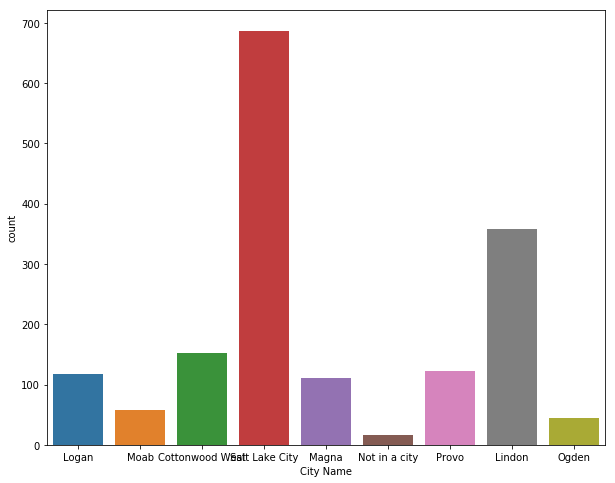

In [165]:
f, ax = plt.subplots(figsize=(10,8))
plot2 = sns.countplot(data2["City Name"])
plot1.set_title("Pollution Levels Per City")
plt.show()

As suspected, SLC has the highest pollution count compared to rural cities like Moab and Logan.

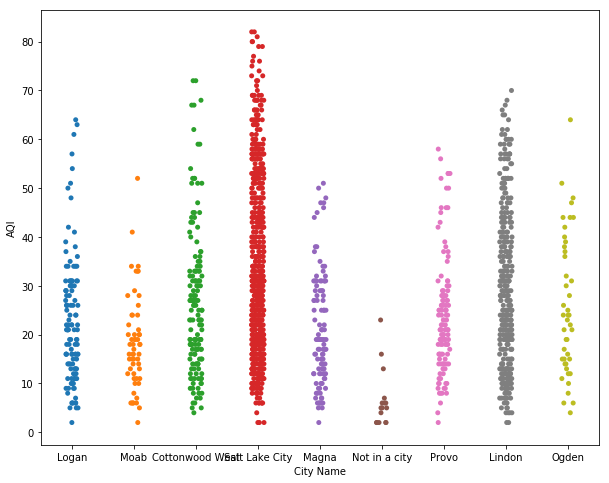

In [166]:
f, ax = plt.subplots(figsize=(10,8))
plot22 = sns.stripplot(x="City Name", y="AQI", data=data2)
plot1.set_title("Pollution in Salt Lake City")
plt.show()

Stripplot shows that SLC has the highest AQI score, being the least healthy of the 9 cities.

AQI = Air Quality Index
The table below shows the parameters of AQI

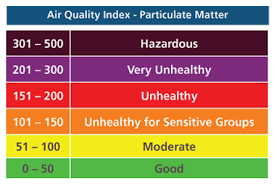

In [167]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename= "/Users/LindseyTakeuchi/Downloads/AQI pic.png", width=400, height=300)

We see that most cities like Provo, Magna, and Ogden lie between the "Good" and "Moderate" section in the AQI. However, SLC consistently lies in the "Moderate" section with only 20 points away from "Unhealthy for Sensative Groups". 

#Dataset3
Children in Poverty in Utah
Excel

In [168]:
#Import Excel data
data3 = pd.read_excel("/Users/LindseyTakeuchi/Downloads/Children_In_Poverty_By_County_In_Utah_2010-2016.xlsx")

In [169]:
#Quick look at the data
data3.head()

,FIPS,County,2010 % Poverty,2011 % Poverty,2012 % Poverty,2012 # in Poverty,2013 % Poverty,2013 # in Poverty,2014 % Poverty,2014 # in Poverty,2015 % Poverty,2015 # in Poverty,2016 % Poverty,2016 # in Poverty,Location 1
0,49035,Salt Lake,12,11,18,52591,19,56178,17,50968,16,48252,15,45911,"Utah\n(39.359772, -111.584173)"
1,49023,Juab,12,13,17,660,18,665,17,641,17,620,15,555,"Utah\n(39.359772, -111.584173)"
2,49007,Carbon,18,16,19,1083,19,1049,19,1047,20,1129,19,1040,"Utah\n(39.359772, -111.584173)"
3,49013,Duchesne,15,14,15,955,15,947,14,881,12,833,12,842,"Utah\n(39.359772, -111.584173)"
4,49041,Sevier,17,16,21,1323,21,1382,21,1359,19,1205,17,1053,"Utah\n(39.359772, -111.584173)"


In [170]:
data3.describe()

,FIPS,2010 % Poverty,2011 % Poverty,2012 % Poverty,2012 # in Poverty,2013 % Poverty,2013 # in Poverty,2014 % Poverty,2014 # in Poverty,2015 % Poverty,2015 # in Poverty,2016 % Poverty,2016 # in Poverty
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,49029.000000,14.379310,14.344828,17.827586,4738.172414,18.275862,4854.275862,17.793103,4670.827586,17.310345,4457.206897,16.103448,4143.275862
std,17.029386,6.494029,5.863177,6.089036,10526.718336,6.813309,11087.812804,6.779061,10393.667564,7.096797,9780.773601,6.548418,9207.603259
min,49001.000000,5.000000,5.000000,6.000000,15.000000,7.000000,23.000000,8.000000,27.000000,6.000000,22.000000,5.000000,28.000000
25%,49015.000000,11.000000,10.000000,13.000000,406.000000,13.000000,328.000000,13.000000,320.000000,12.000000,337.000000,11.000000,275.000000
50%,49029.000000,13.000000,14.000000,18.000000,1083.000000,17.000000,1068.000000,17.000000,1047.000000,17.000000,975.000000,15.000000,889.000000
75%,49043.000000,17.000000,16.000000,21.000000,2413.000000,21.000000,2571.000000,21.000000,2384.000000,20.000000,2405.000000,18.000000,2514.000000
max,49057.000000,36.000000,31.000000,33.000000,52591.000000,37.000000,56178.000000,39.000000,50968.000000,40.000000,48252.000000,34.000000,45911.000000


In [171]:
#Check how many rows in each column are null
data3.isna().sum().sort_values(ascending=False)

Location 1           0
2016 # in Poverty    0
2016 % Poverty       0
2015 # in Poverty    0
2015 % Poverty       0
2014 # in Poverty    0
2014 % Poverty       0
2013 # in Poverty    0
2013 % Poverty       0
2012 # in Poverty    0
2012 % Poverty       0
2011 % Poverty       0
2010 % Poverty       0
County               0
FIPS                 0
dtype: int64

In [172]:
dataSLC = pd.DataFrame([[2010, 12], [2011, 11], [2012, 18], [2013, 19], [2014, 17], [2015, 16], [2016, 15]])
dataSLC.columns=["Year", "Poverty"] 

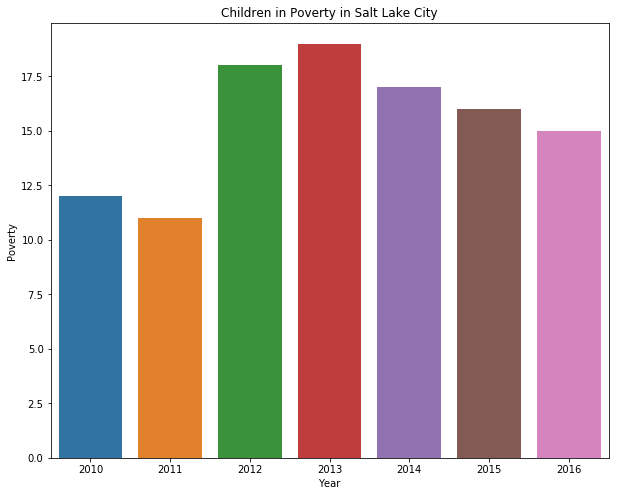

In [173]:
f, ax = plt.subplots(figsize=(10,8))
plot3 = sns.barplot(x="Year", y="Poverty", data=dataSLC)
plot3.set_title("Children in Poverty in Salt Lake City")
plt.show()

The increase in 2012 and 2013 can be largely due to the sputtering national economy. The percentage of children living in poverty exceeded 18 percent in Salt Lake City. 

After 2013, the overall economic growth seems to be translating into decline in poverty rates. 


“Utah currently is a place of growth and change. New people are continuing to come. Economic prosperity is expanding. We’re not in a boom, but our growth seems to be sustainable,” says Pam Perlich, director of demographics at the University of Utah‘s Kem C. Gardner Policy Institute.

In [174]:
dataUtah = pd.DataFrame([[2012, 56612], [2013, 60221], [2014, 54896], [2015, 52039], [2016, 49401]])
dataUtah.columns=["Year", "Poverty"] 

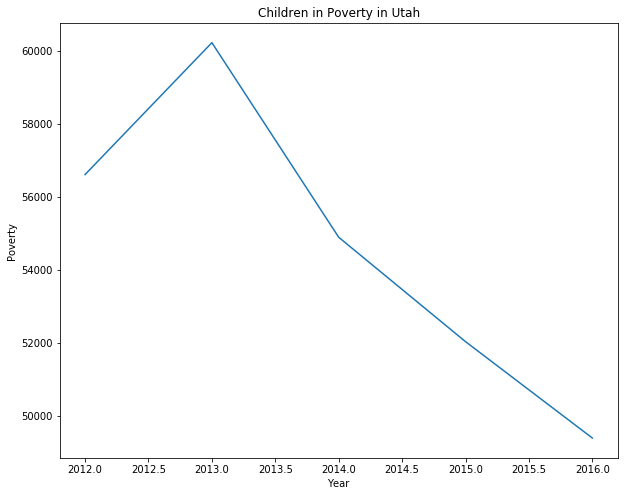

In [175]:
f, ax = plt.subplots(figsize=(10,8))
plot33 = sns.lineplot(x="Year", y="Poverty", data=dataUtah)
plot33.set_title("Children in Poverty in Utah")
plt.show()

This graph shows similar trends from the last graph on the state-scale. Children in Poverty rates increased between 2012 and 2013. With the economic expansion and state-run programs to alleviate poverty, overall counts have been on decline. As of 2016, Utah has the 3rd lowest rate of children in poverty. 